# Analyse data

## Introduction

In this project I attempt to look at the evolution of the german language over time. For this purpose I have gathered all available data from 1946 until 2021 from the Zeit API (see Data_Collection.iypbn). Die Zeit is a German newspaper and the API offers access to headlines, subtitles, etc. of all Zeit articles dating back to 1946.
I have split the data into five epochs:
* **1946 to 1960**: post war time and beginning of DDR until construction of Berlin wall
* **1960 to 1990**: DDR until fall of the Berlin wall
* **1990 to 2000**: 90s, post Wende, Introduction of the internet to private households
* **2000 to 2010**: early 2000s, rise of globalization, social media, first smartphones
* **2010 to 2021**: Introduction of smartphones, social media followers as currency, recently covid 19

Afterwords I have trained a Word2Vec model from the Natural Language processing Library gensim on each of the datasets, to obtain vectors for all words (see Data_Preparation.iypbn). To recognize different iterations of the same word stem as the same word, I have applied a stemmer on the words, which is why they might be misspelled or cut off. Because I am more familiar with python and there are a lot of usefull libraries available, I have done the data collection and preparation part in Python. I have included the notebooks for reasons of completion.\
This analysis aims to understand how the German language has changed over time with respect to sexism and the societal perception of women.
I will focus mainly on the perception of feminism over time and differences between men and women. 

In [1]:
library(MASS)

In [2]:
headm = function (m, i = 3, j = 5) head(m[, 1:j], i)

## Load Data

#### 1946 to 1960

In [3]:
vecs_1946_1960 = read.csv("data/vecs_1946_1960.csv",stringsAsFactors=FALSE, encoding='UTF-8')
#write to matrix
M_1946_1960 = as.matrix(vecs_1946_1960[,-1])
rownames(M_1946_1960) = vecs_1946_1960[,1]
headm(M_1946_1960)

,X0,X1,X2,X3,X4
deutsch,-0.7172902,1.0075834,-0.1388931,0.4830876,-0.5612301
jahr,-1.0215657,1.6884174,0.7056381,1.1676453,0.6350139
neu,-0.3216743,0.7848537,0.2362233,0.4202664,0.2111601


In [4]:
dim(M_1946_1960)

[1] 16747   100

#### 1960 to 1990

In [5]:
vecs_1960_1990 = read.csv("data/vecs_1960_1990.csv",stringsAsFactors=FALSE, encoding='UTF-8')
M_1960_1990 = as.matrix(vecs_1960_1990[,-1])
rownames(M_1960_1990) = vecs_1960_1990[,1]
headm(M_1960_1990)

,X0,X1,X2,X3,X4
jahr,3.0075152,-0.3423978,2.2038167,0.6420327,-1.0893970
deutsch,0.7154985,-1.4726850,0.7606826,-0.8659907,0.1591695
neu,-0.9920948,0.6275672,-0.1029891,-1.9642522,0.1377494


In [6]:
dim(M_1960_1990)

[1] 45248   100

#### 1990 to 2000

In [7]:
vecs_1990_2000 = read.csv("data/vecs_1990_2000.csv",stringsAsFactors=FALSE, encoding='UTF-8')
M_1990_2000 = as.matrix(vecs_1990_2000[,-1])
rownames(M_1990_2000) = vecs_1990_2000[,1]
headm(M_1990_2000)

,X0,X1,X2,X3,X4
jahr,-0.3336563,-0.07371013,-0.2202843,2.3366446,-0.57369840
deutsch,-0.4280776,0.86511576,-0.6286238,-0.1845861,0.12175704
neu,-0.4572081,1.19328190,-0.5933165,0.2332578,0.04610798


In [8]:
dim(M_1990_2000)

[1] 18495   100

#### 2000 to 2010

In [9]:
vecs_2000_2010 = read.csv("data/vecs_2000_2010.csv",stringsAsFactors=FALSE, encoding='UTF-8')
M_2000_2010 = as.matrix(vecs_2000_2010[,-1])
rownames(M_2000_2010) = vecs_2000_2010[,1]
headm(M_2000_2010)

,X0,X1,X2,X3,X4
neu,0.4494306,0.3943419,-0.2573943,0.6438732,-1.12563310
zeit,-2.0382520,-1.0859548,1.3988180,1.1954069,1.15654470
deutsch,0.7730685,0.3225649,-0.1836042,-0.6356880,-0.09327357


In [10]:
dim(M_2000_2010)

[1] 20010   100

#### 2010 to 2021

In [11]:
vecs_2010_2021 = read.csv("data/vecs_2010_2021.csv",stringsAsFactors=FALSE, encoding='UTF-8')
M_2010_2021 = as.matrix(vecs_2010_2021[,-1])
rownames(M_2010_2021) = vecs_2010_2021[,1]
headm(M_2010_2021)

,X0,X1,X2,X3,X4
neu,0.1117256,2.0509005,-1.686333,1.6069443,-2.7012773
mehr,0.3134734,-0.4895407,-1.315266,0.5988743,0.4423412
deutsch,-0.5040821,-0.1751449,-3.289553,0.7963957,-1.3160998


In [12]:
dim(M_2010_2021)

[1] 42738   100

The first interesting thing to notice, is that between 2010 and 2021 double the amount of words have been used in comparison to the previous decades. In fact, between 1960 and 1990, a time span of three decades, about the same amount of words have been used as in 2010 to 2021. However, it is worth mentioning that between 2010 to 2021 there was also a lot more data available than in the previous epochs. 
The timespan of 1960 to 1990 is roughly two thirds of 2010 to 2021 in size, yet the amount of words used is roughly the same. This might be due to the broader time spectrum and consequently larger amount of historical events happening.

#### Adjectives

A list of both positive and negative adjectives

In [13]:
adjectives = read.csv("data/adjectives.csv",stringsAsFactors=FALSE, encoding='UTF-8')
head(adjectives)

,X,pos,neg
,<int>,<chr>,<chr>
1,0,liebevoll,affektiert
2,1,freundlich,gekunstelt
3,2,bescheid,geziert
4,3,respektvoll,aggressiv
5,4,aufrecht,angeber
6,5,sorgfalt,anmass


## Random observations

When playing around with the data, one notices a few interesting things:

In [14]:
'sexismus' %in% vecs_1946_1960$word

[1] FALSE

In [15]:
'feminismus' %in% vecs_1946_1960$word

[1] FALSE

In [16]:
'emanzipation' %in% vecs_1946_1960$word

[1] TRUE

The 1946 to 1960 dataset neither contains the word 'sexism' nor 'feminism', this speaks to the ignorance towards these subjects in this time period. At least 'emanzipation' is included.

## Dimensionality Reduction

Let's start by plotting the data to observe interesting relationships. We apply PCA, so we can plot the two dimensions with the highest information content.

In [17]:
m_1946_1960.pca = prcomp(M_1946_1960, scale=TRUE, center=TRUE)

In [18]:
m_1960_1990.pca = prcomp(M_1960_1990, scale=TRUE, center=TRUE)

In [19]:
m_1990_2000.pca = prcomp(M_1990_2000, scale=TRUE, center=TRUE)

In [20]:
m_2000_2010.pca = prcomp(M_2000_2010, scale=TRUE, center=TRUE)

In [21]:
m_2010_2021.pca = prcomp(M_2010_2021, scale=TRUE, center=TRUE)

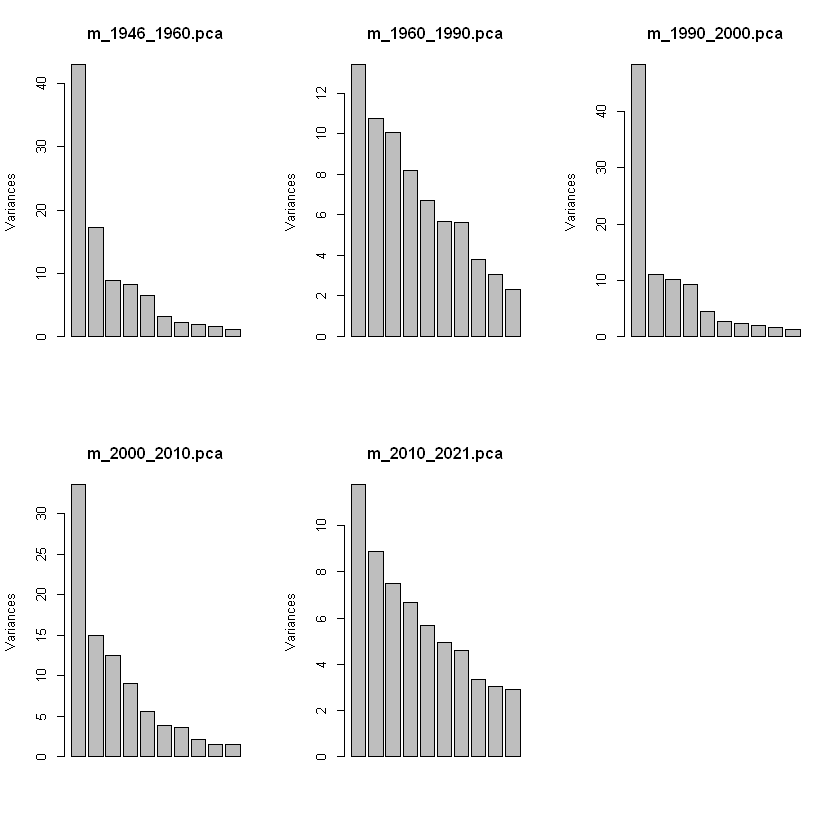

In [22]:
par(mfrow=c(2,3))
plot(m_1946_1960.pca)
plot(m_1960_1990.pca)
plot(m_1990_2000.pca)
plot(m_2000_2010.pca)
plot(m_2010_2021.pca)

The plots show, that for most of the data sets the majority of the information is given by the first dimension, only the data sets from 1960 to 1990 and 2010 to 2021 show a broader distribution of variance. These two are also the epochs with the largest dataset, so this is not surprising.

## Inspecting the data

We plot the first two dimensions of our data to see if we can find patterns.
We want to observe how the use of language has evolved over time and consequenty make observations about the changes in society. For this purpose, we highlight the negative adjectives and positive adjectives from the Adjectives data frame, as well as the words 'Feminismus','Mann', 'Frau', 'Emanzipation', 'Sex'. 
We know that with Word2Vec models, the distance between two words give a notion of how similar these words are, two words that have been mentioned in a similiar context will be close to each other. In the Word2Vec documentation, the developers use the cosine similarity as a measure of similarity, which ranges from [1;-1] with 1 being identical and -1 being least similar, so we will do the same.

In [23]:
library('lsa')

Warning message:
"package 'lsa' was built under R version 4.0.5"
Loading required package: SnowballC



In [24]:
# we built a dataframe to save our results
sim_pos_df = data.frame("epoch"= c('1946_1960', '1960_1990','1990_2000','2000_2010','2010_2021'))
sim_neg_df = data.frame("epoch"= c('1946_1960', '1960_1990','1990_2000','2000_2010','2010_2021'))

In [25]:
plot_pca<- function(m_pca, M) {
    # set up axes, don't show data points
    plot(m_pca$x[,1], m_pca$x[,2], type="n")
    # add all words in light grey
    text(m_pca$x[,1], m_pca$x[,2], rownames(M), col="gray80")
    
    #positive adjectives
    text(m_pca$x[rownames(M) %in% adjectives$pos,1], #x pos
    m_pca$x[rownames(M) %in% adjectives$pos,2], #y pos
    rownames(M)[rownames(M) %in% adjectives$pos], col="green") #highlight positive words in green
    #negative adjectives
    text(m_pca$x[rownames(M) %in% adjectives$neg,1], #x pos
    m_pca$x[rownames(M) %in% adjectives$neg,2], #y pos
    rownames(M)[rownames(M) %in% adjectives$neg], col="purple") #highlight negative adjectives in purple
    
    #highlight selected words
    text(m_pca$x['frau',1], m_pca$x['frau',2], 'frau', col="red") #highlight the word 'woman' in red
    text(m_pca$x['mann',1], m_pca$x['mann',2], 'mann', col="blue") #highlight the word 'man' in blue
    
    text(m_pca$x['emanzipation',1], m_pca$x['emanzipation',2], 'emanzipation', col="black") # highlight 'emancipation'
    text(m_pca$x['sex',1], m_pca$x['sex',2], 'sex', col="black")# highlight 'sex'
    if('feminismus' %in% rownames(M)){
       text(m_pca$x['feminismus',1], m_pca$x['feminismus',2], 'feminismus', col="black") # highlight 'feminism'
    }

}

### 1946 to 1960

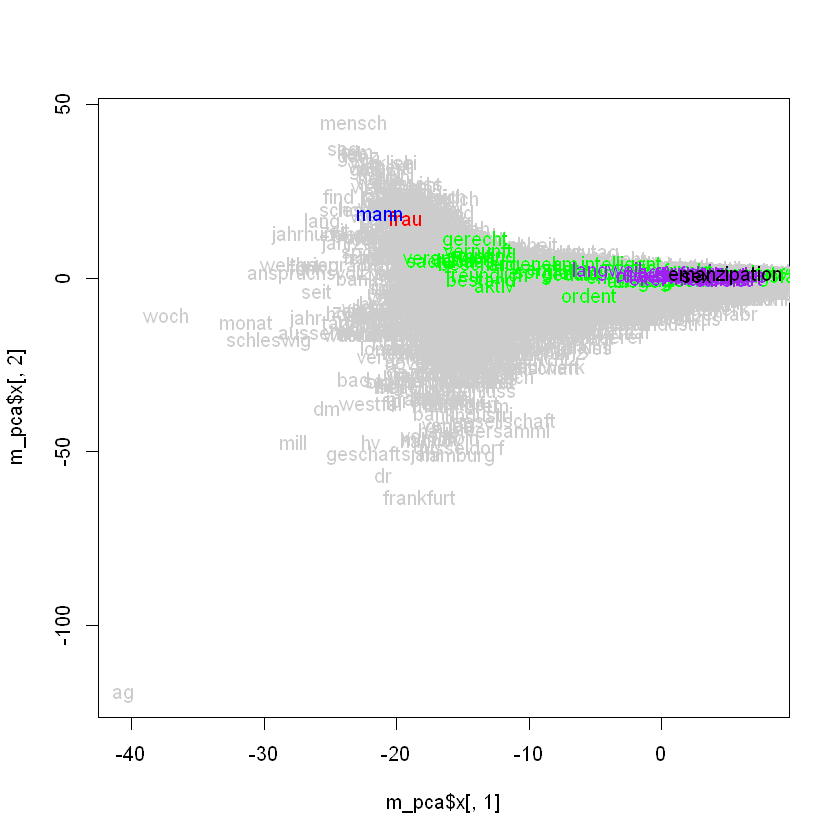

In [26]:
plot_pca(m_1946_1960.pca,M_1946_1960)

The plot indicates, that negative (purple) and positive (green) adjectives follow different distributions. It also appears as if 'emanzipation' is right in the negatively connotated area, as well as the word 'sex' (which is hidden underneath 'emanzipation'). Man and woman are close together and near 'Mensch'.
However, the plot only depicts the first two dimensions, to see how similar the highlighted words are to negative/positive adjectives, we need to take a look at the cosine similarities:

Let's look at the similarities to the highlighted words.

cosine similarity between 'emanzipation' and the positive/negative adjectives:

In [294]:
#similarity to mean of positive adjectives
cosine(c(colMeans(m_1946_1960.pca$x[rownames(M_1946_1960) %in% adjectives$pos,1:100])),
       c(m_1946_1960.pca$x['emanzipation',1:100]))

-0.7779328


In [293]:
#similarity to mean of negative adjectives
cosine(c(colMeans(m_1946_1960.pca$x[rownames(M_1946_1960) %in% adjectives$neg,1:100])),
       c(m_1946_1960.pca$x['emanzipation',1:100]))

0.9368439


We can conclude, that 'emanzipation' was highly associated with negative adjectives and not with positive ones.

Let's repeat this with the other words and save the results to our similarity dataframes:

In [304]:
calc_similarity<- function(m_pca, M,max_dim, row_entry){
    #feminismus
    if('feminismus' %in% rownames(M)){
        sim_pos_df[row_entry, 'feminismus']=cosine(c(colMeans(m_pca$x[rownames(M) %in% adjectives$pos,1:max_dim])), 
                                                     c(m_pca$x['feminismus',1:max_dim]))
        sim_neg_df[row_entry, 'feminismus']=cosine(c(colMeans(m_pca$x[rownames(M) %in% adjectives$neg,1:max_dim])), 
                   c(m_pca$x['feminismus',1:max_dim]))
    }
    #emanzipation
    sim_pos_df[row_entry,'emanzipation']=cosine(c(colMeans(m_pca$x[rownames(M) %in% adjectives$pos,1:max_dim])), 
               c(m_pca$x['emanzipation',1:max_dim]))
    sim_neg_df[row_entry,'emanzipation']=cosine(c(colMeans(m_pca$x[rownames(M) %in% adjectives$neg,1:max_dim])), 
               c(m_pca$x['emanzipation',1:max_dim]))
    #sex
    sim_pos_df[row_entry,'sex']=cosine(c(colMeans(m_pca$x[rownames(M) %in% adjectives$pos,1:max_dim])), 
               c(m_pca$x['sex',1:max_dim]))
    sim_neg_df[row_entry,'sex']=cosine(c(colMeans(m_pca$x[rownames(M) %in% adjectives$neg,1:max_dim])), 
               c(m_pca$x['sex',1:max_dim]))
    #mann
    sim_pos_df[row_entry,'mann']=cosine(c(colMeans(m_pca$x[rownames(M) %in% adjectives$pos,1:max_dim])), 
               c(m_pca$x['mann',1:max_dim]))
    sim_neg_df[row_entry,'mann']=cosine(c(colMeans(m_pca$x[rownames(M) %in% adjectives$neg,1:max_dim])), 
               c(m_pca$x['mann',1:max_dim]))
    #frau
    sim_pos_df[row_entry,'frau']=cosine(c(colMeans(m_pca$x[rownames(M) %in% adjectives$pos,1:max_dim])), 
               c(m_pca$x['frau',1:max_dim]))
    sim_neg_df[row_entry,'frau']=cosine(c(colMeans(m_pca$x[rownames(M) %in% adjectives$neg,1:max_dim])), 
               c(m_pca$x['frau',1:max_dim]))
}


In [305]:
calc_similarity(m_1946_1960.pca,M_1946_1960,30,1)

we will compare the results for the different epochs later on

### 1960 to 1990

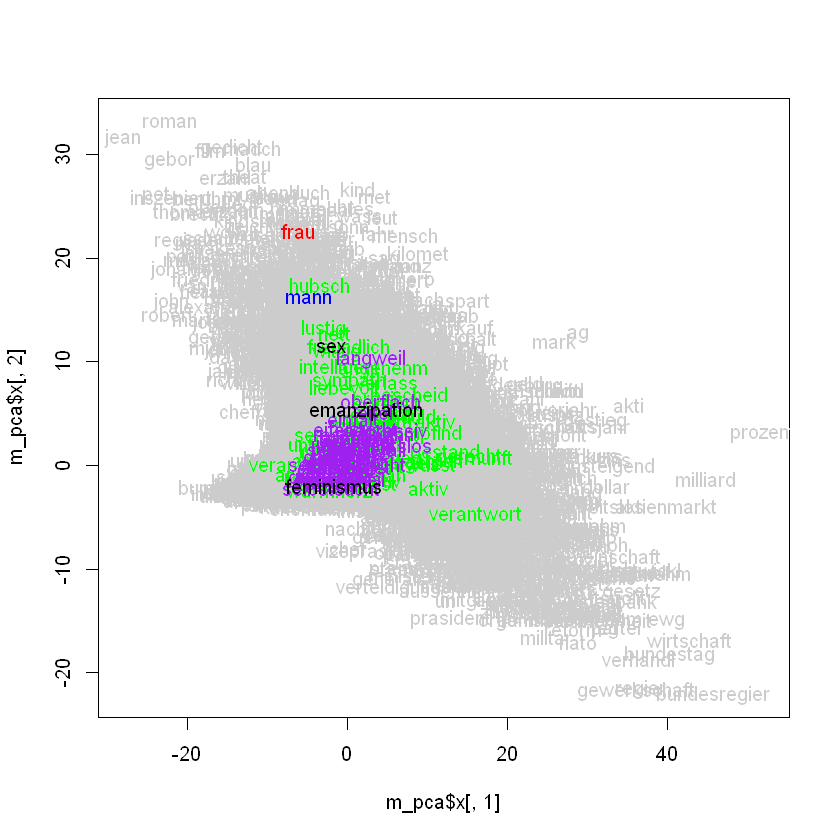

In [299]:
plot_pca(m_1960_1990.pca,M_1960_1990)

From the plot it looks like sex gained a more positive connotation, but feminism and emanzipation still appear to be in the negative area. Man and woman have drifted apart, with woman being notably more close to 'child' and 'man' being somewhere near the center of the data. This loosely mirrors the traditional family model which was still the most common one in the 20th century.

#### Similarity

In [ ]:
calc_similarity(m_1960_1990.pca,M_1960_1990,70,2)

### 1990 to 2000

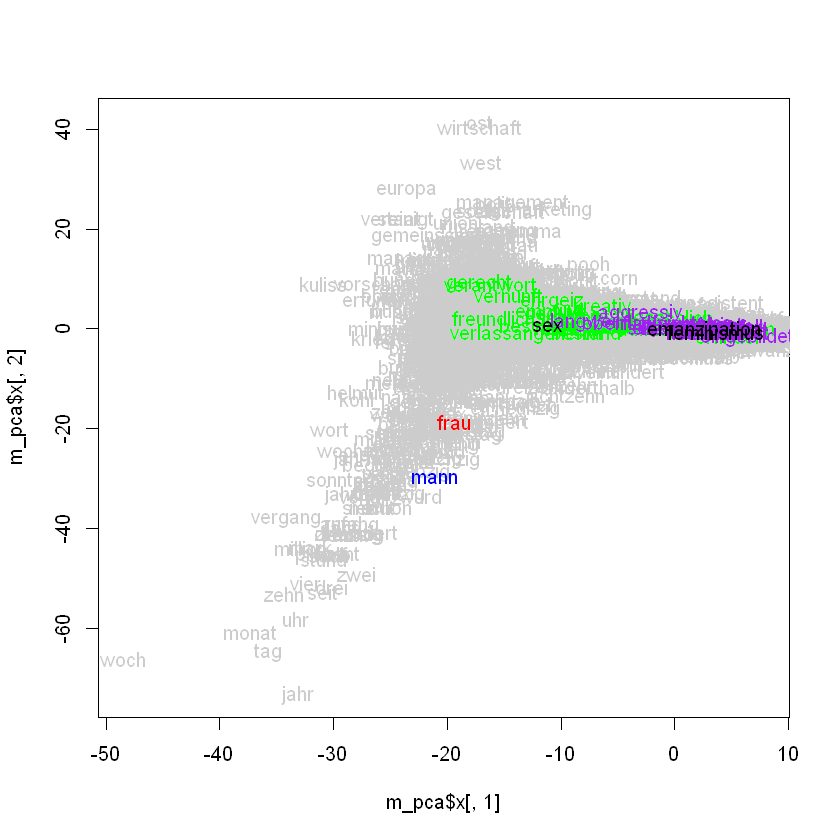

In [301]:
plot_pca(m_1990_2000.pca,M_1990_2000)


Once again, emancipation and feminism are close to negative adjectives, when looking at the first two dimensions. Sex is in the positive area and 'frau' and 'mann' are still further apart but with woman being more centered than man.

#### Similarity

In [268]:
calc_similarity(m_1990_2000.pca,M_1990_2000,30,3)

### 2000 to 2010

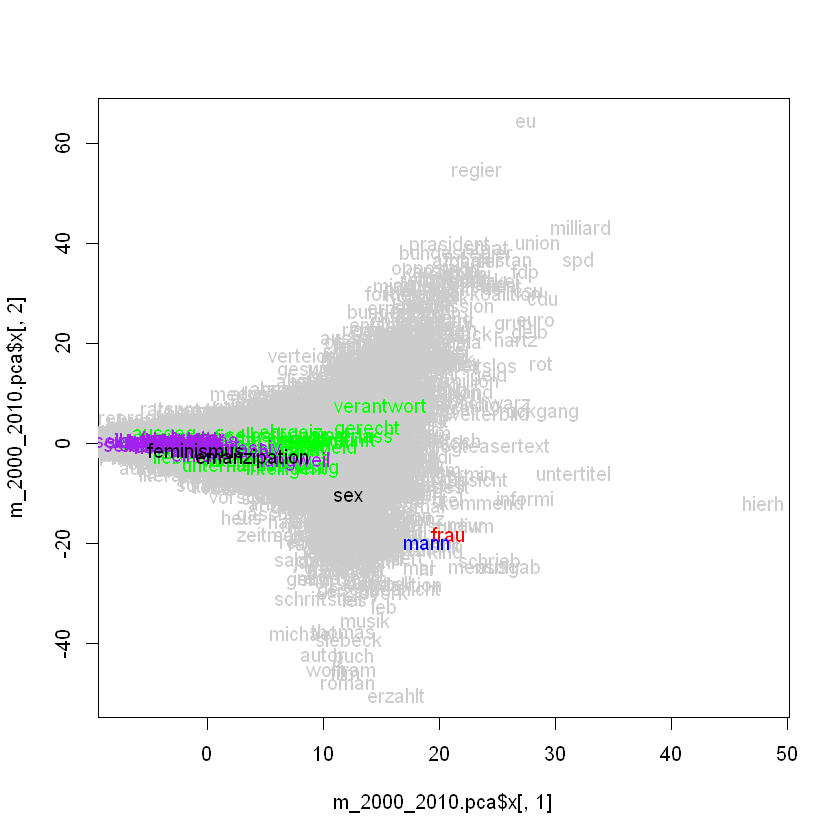

In [255]:
plot_pca(m_2000_2010.pca,M_2000_2010)

Here, sex seems to have escaped judgment, positive or negative but is now closer located to man and woman, which are now located very closely together. 'Emanzipation' seems to have shifted towards the positive adjectives but feminism is still more on the negative side. This might be due  to the problematic nature of the subject.

#### Similarity

In [269]:
calc_similarity(m_2000_2010.pca,M_2000_2010,30,4)

### 2010 to 2021

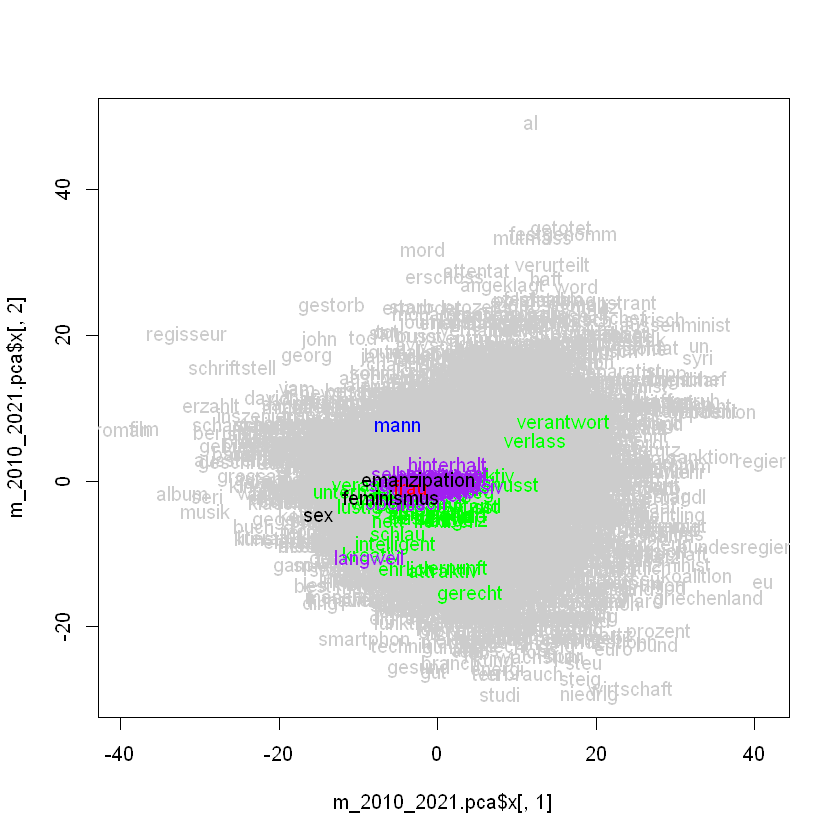

In [256]:
plot_pca(m_2010_2021.pca,M_2010_2021)

'Frau' is now buried in the center, close to positive and negative adjectives. 'Mann' takes a side role, this probably depicts the heated women's rights debate that has recently gained more attention. Emancipation and feminism are now close to woman and it's actually more of a surprise that they haven't been until now. Also, the fact that they are now located in the center of the dataset rather than on the border, shows the increased attention the subject got. Sex is still in the gray area.

#### Similarity

In [270]:
calc_similarity(m_2010_2021.pca,M_2010_2021,70,5)

## Results

So far, we have only speculated about the roles of these words in society based on the first two dimensions. However, we're operating in a space of 100 dimensions, so we need to take the rest into consideration before we make definit conclusions.  We now plot the cosine similiarity we have previously computed, to see if we can confirm our assumptions. To add some additional context, we will also look at the ten most similar words over the epochs.  

#### Helper functions

In [145]:
#plot function
plot_similarities <- function(word) {
plot(c(-1,-0.5,0,0.5,1.0), axes=FALSE, xlab="epochs", ylab=paste('distances', word, sep=" "),type='n')
axis(2)
axis(1, at=seq_along(sim_pos_df[,'epoch']),labels=sim_pos_df[,'epoch'], las=1)

points(sim_pos_df[,word], col ='green',pch = 16)
lines(sim_pos_df[,word], col ='green')
points(sim_neg_df[,word], col ='purple',pch = 17)
lines(sim_neg_df[,word], col ='purple')

legend(4, 1, legend=rev(c('similarity neg','similarity pos')),
col=c('green','purple'),  pch=c(16,17), bty="n")
box()
}

In [261]:
#most similar words function
get_most_similar <- function(word, k=10) {
df = data.frame()
if(word %in% rownames(M_1946_1960)){
    sim_Frau_1946_1960=cosine(M_1946_1960[word,],t(M_1946_1960))
    sim_Frau_sorted_1946_1960=sort(sim_Frau_1946_1960, decreasing = TRUE)
    df[1:k,'1946_1960']=names(sim_Frau_sorted_1946_1960[2:(k+1)])
}
if(word %in% rownames(M_1960_1990)){
    sim_Frau_1960_1990=cosine(M_1960_1990[word,],t(M_1960_1990))
    sim_Frau_sorted_1960_1990=sort(sim_Frau_1960_1990, decreasing = TRUE)
    df[1:k,'1960_1990']=names(sim_Frau_sorted_1960_1990[2:(k+1)])
}
if(word %in% rownames(M_1990_2000)){
    sim_Frau_1990_2000=cosine(M_1990_2000[word,],t(M_1990_2000))
    sim_Frau_sorted_1990_2000=sort(sim_Frau_1990_2000, decreasing = TRUE)
    df[1:k,'1990_2000']=names(sim_Frau_sorted_1990_2000[2:(k+1)])
}
if(word %in% rownames(M_2000_2010)){
    sim_Frau_2000_2010=cosine(M_2000_2010[word,],t(M_2000_2010))
    sim_Frau_sorted_2000_2010=sort(sim_Frau_2000_2010, decreasing = TRUE)
    df[1:k,'2000_2010']=names(sim_Frau_sorted_2000_2010[2:(k+1)])
}
if(word %in% rownames(M_2010_2021)){
    sim_Frau_2010_2021=cosine(M_2010_2021[word,],t(M_2010_2021))
    sim_Frau_sorted_2010_2021=sort(sim_Frau_2010_2021, decreasing = TRUE)
    df[1:k,'2010_2021']=names(sim_Frau_sorted_2010_2021[2:(k+1)])
}
print(df)
}

### Words in context

#### Sex

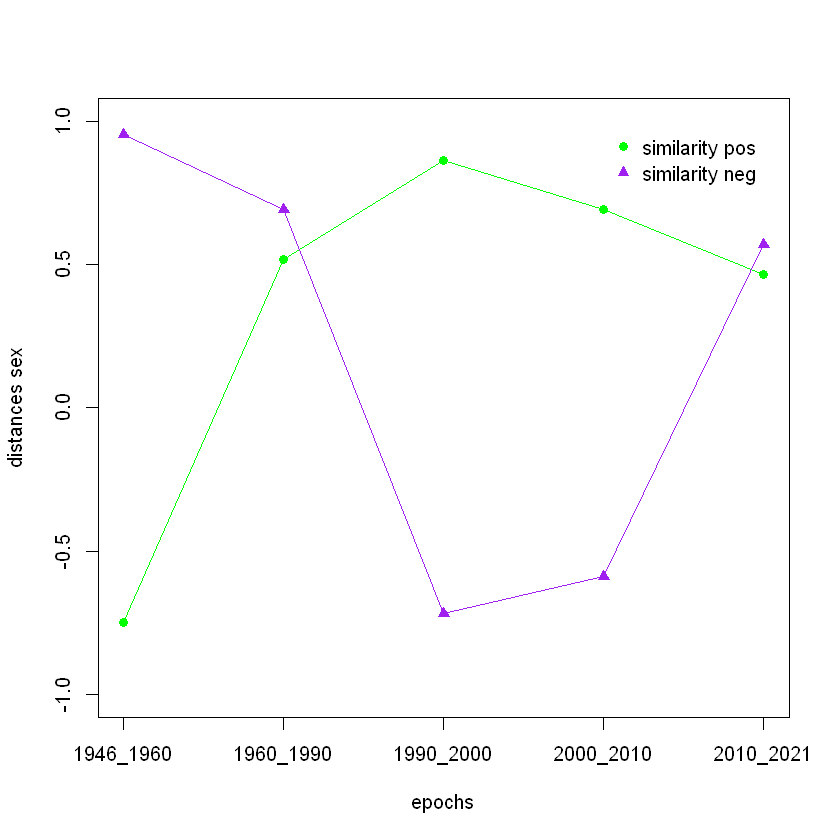

In [272]:
plot_similarities('sex')

It seems like between **1946 to 1990** sex was considered vulgar and closely associated with negative adjectives. Between **1960 and 1990**, it was still negatively connotated, however, it also got a lot more similar to positive adjectives, which likely reflects the hippie movement of the 70s. Also, considering how large the epoch is, society's perception of the subject might have shifted within the time span. Starting from the ninetees, people started to get more open about the subject, it was primarily positively connotated. It stayed positive over the following decades, but with a sinking trend. Between **2010 and 2021** it also had a positive similarity to negative adjectives.

In [273]:
get_most_similar('sex',10)

    1946_1960 1960_1990  1990_2000    2000_2010     2010_2021
1         hal      crim   telephon         kreb          lach
2      schult      snob       cann      vergess          korp
3        duft    kitsch  unterhalt       alltag          hund
4     zahllos     charm      sport        madch heterosexuell
5     schrank    horror     kamera    obdachlos         nackt
6        fass      erot bildschirm         voll        spruch
7  bekenntnis    athlet     kriegt schliesslich      manchmal
8      schalt   liebhab    betrunk       heimat    geschlecht
9     perfekt      magi      shows   fasziniert      mannlich
10       luis  zartlich    gefragt  anthropolog        pornos


The table with the 10 most similar words confirms these observations. Between **1946 to 1990** it seems like the topic was not directly discussed at all, probably just in connection with scandals. Between **1960 and 1990** the focus was likely on movies, since we mainly get a list of genres and flowery adjectives, although there is a more positive connotation in the connected words. With the rise of technology sex get's a modern twist in the 90s and is now connected to telephones and cameras. Starting from the 2000s it seems like we discuss more serious issues connceted with sex, such as homelessness, which explains the drop in the positive connotation. Between **2010 to 2021** it looks like the words are actually connected to sex itself, meaning that society is more open towards the subject and one can now discuss it in a serious newspaper.

#### Emanzipation

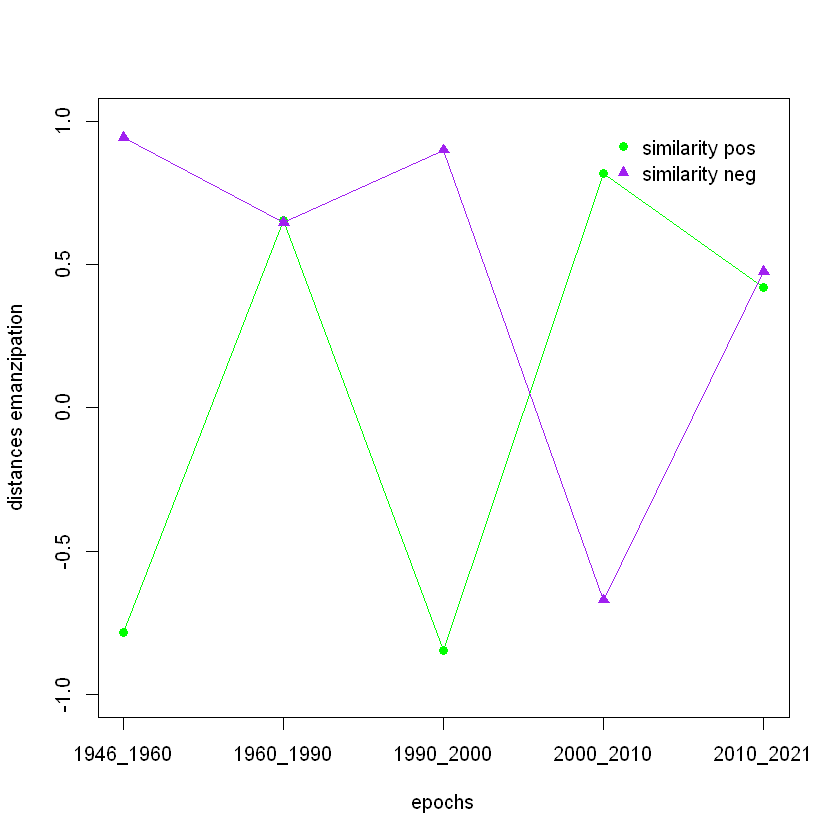

In [147]:
plot_similarities('emanzipation')

Emancipation seems to fluctuate: in the first time period it was closer to negative adjectives, then between **1960 and 1990** it's scarcely more associated with positive adjectives, but also with negative ones. Once again, this might be the result of picking such a large time span. The large positive similarity might be a result of the women's right movements from the 70s. Between **1990 and 2000** it goes back to being negatively connotated, then it get's a more positive association. Finally between **2010 to 2021** it is related to both positve and negative adjectives. The fact that it is still connotated with negative adjectives might reflect the recent rise in criticism in the lack of equality between the sexes or more radical feminist movements.

In [275]:
get_most_similar('emanzipation',10)

      1946_1960         1960_1990           1990_2000 2000_2010
1    herrschaft           sexuell              wander   ausflug
2        verrat           denkend               zuseh    kitsch
3  leidenschaft selbstverwirklich     kulturgeschicht   elegant
4        schlag       ausgebeutet           problemat  ursprung
5      verdacht        mentalitat             neuzeit       hal
6           ohr           hochmut                warn     atlas
7        afrika       unterdruckt            sorgfalt     staub
8       genauso          heroisch nationalsozialismus glanzvoll
9      abenteur              kult          ratselhaft  verklart
10       forsch        heranwachs                ober    melodi
           2010_2021
1        patriarchat
2          alterwerd
3         eifersucht
4         zauberhaft
5      selbstermacht
6            neigung
7          stereotyp
8         frauenbild
9  wissenschaftlerin
10        sexualitat


The word 'Emanzipation' was not connected to women's rights at all in **1946 to 1960**. It was generally considered to be more of a negative thing, judging by the similarity to negative adjectives and words such as 'Verrat', which are high on the list. Between **1960 and 1990** it get's a more positive spin, words such as 'heroisch' 'selbstverwirklichend' and 'denkend' are next to 'unterdrückt' and 'ausgebeutet' (we can see this dual connotation in the similarity to both positive and negative adjectives). There are also effects of the sexual liberation movement from the 70s, with 'sexuell' being on top of the list. The 90s seem to reflect on the history of emancipation ('Nationalsozialismus','Kulturgeschichte') and the 2010s seem to have a more critical outlook on the word. Words such as 'verklärt' and 'kitsch', 'elegant' are on the list, indicating that emancipation is a luxury rather than a necessity. Between **2010 to 2021** the word seems to be primarily connected to women's rights. Words such as 'Patriarchat', 'Frauenbild', Wissenschaftlerin' (or probably the lack thereof) are discussed. 

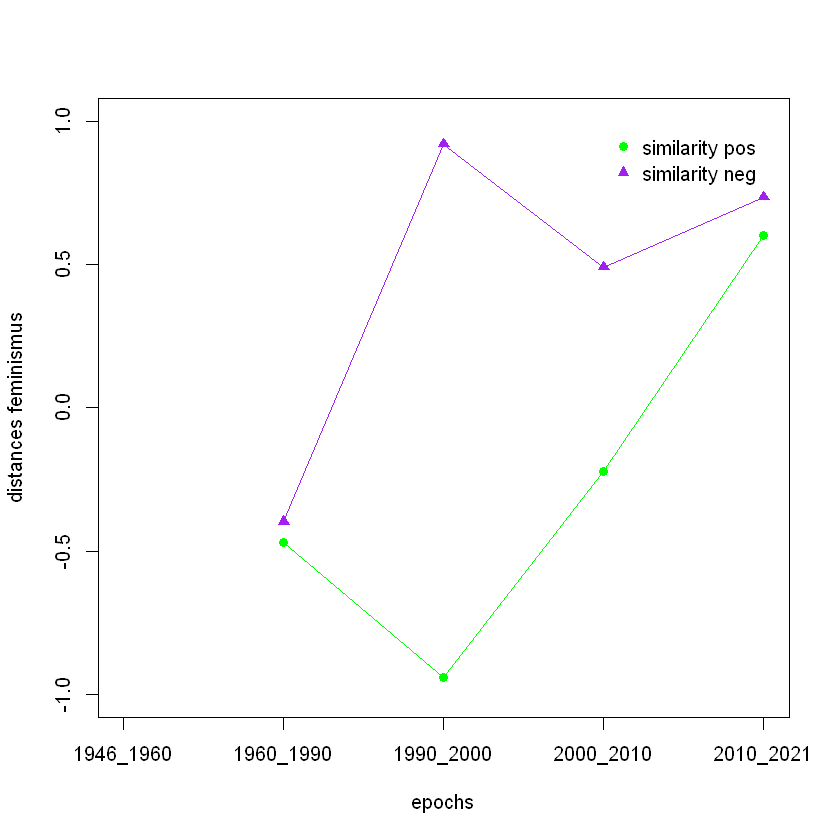

In [149]:
plot_similarities('feminismus')

Interestingly, while we nowadays primarily associate emancipation with women's rights, the plot for feminism looks a lot different to the emancipation plot.
The fact that between **1946 to 1960** feminism was not even considered worth acknowledging, speaks to itself. Between **1960 to 1990** it was neither similar to negative, nor to positive adjectives. Starting from the 90s, the term got a more negative connotation, although that probably depicts the starting awareness for discrimination against women, rather than society's opinion about feminism. Finally, by **2010 to 2021** the term is associated with more positive adjectives, probably depicting the popularity of the movement. However, it is still strongly connected to negative adjectives.

In [277]:
get_most_similar('feminismus',10)

             1960_1990  1990_2000  2000_2010    2010_2021
1              hautnah   pauschal   freundin     feminist
2               verhor ministerin     lassig         erot
3             nihilist     serios depression        polem
4          ruckschluss  bestatigt    element   sexualitat
5          heilanstalt   enthullt   leichtig   philosophi
6             entbloss    abrechn      figur       asthet
7          strafgefang gefurchtet     tilman         vink
8                beltz   fliegend       hero        essay
9          anarchismus  flohmarkt       form         wahn
10 gemeinschaftsarbeit       numm     kitsch emanzipation


Between **1960 to 1990** the inevitable consequence of feminism was apparantly anarchy and nihilism. What is there left to believe in, when the natural order of being is disrupted and women are considered equal to men? From **1990 to 2010** we have a rising awareness for the subject, words such as 'Ministerin' and 'Depression' are connected to it. In the **2010s** feminism became a much more present topic in media, and gained more importance in society.

### Mann/Frau

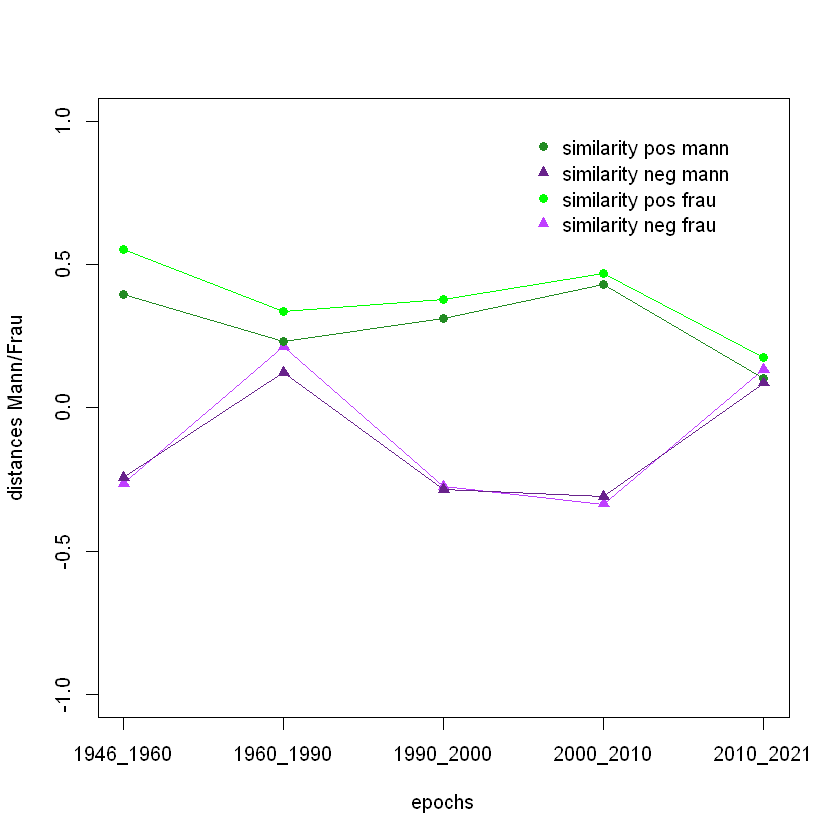

In [159]:
plot(c(-1,-0.5,0,0.5,1.0), axes=FALSE, xlab="epochs", ylab='distances Mann/Frau',type='n')
axis(2)
axis(1, at=seq_along(sim_pos_df[,'epoch']),labels=sim_pos_df[,'epoch'], las=1)

points(sim_pos_df[,'frau'], col ='green',pch = 16)
lines(sim_pos_df[,'frau'], col ='green')
points(sim_neg_df[,'frau'], col ='darkorchid1',pch = 17)
lines(sim_neg_df[,'frau'], col ='darkorchid1')

points(sim_pos_df[,'mann'], col ='forestgreen',pch = 16)
lines(sim_pos_df[,'mann'], col ='forestgreen')
points(sim_neg_df[,'mann'], col ='darkorchid4',pch = 17)
lines(sim_neg_df[,'mann'], col ='darkorchid4')

legend(3.5, 1, legend=rev(c('similarity neg frau','similarity pos frau','similarity neg mann','similarity pos mann')),
col=c('forestgreen','darkorchid4','green','darkorchid1'),  pch=c(16,17), bty="n")
box()

On a positive note, the words men and women seem to have been used in a fairly similar context over the epochs, with women being  even slightly more similar to the positive adjectives than men.

In [281]:
get_most_similar('mann',10)

    1946_1960   1960_1990 1990_2000        2000_2010    2010_2021
1        frau       madch      frau             frau        madch
2       madch        frau      jung            madch jungfraulich
3       dicht        dehl      kind             jung       jahrig
4        jung     ehemann      haus         achttaus vergewaltigt
5      thomas      randow     klein             wild         mutt
6        kind         dam     madch         angehalt         frau
7         nam         vat      mutt       generation   begrapscht
8   geschicht        sohn negerlein            traum          vat
9       roman        brud      bild          gesicht     mannlich
10 generation verheiratet       tot fuhrungsposition    studentin


The results of the most similiar to 'Mann' table however, are very telling, on the first glance, men seem to be primarily connected to family, with words such as 'Frau, Kind, Vater' being constantly present in each epoch. However between **1946 and 1969** we also get words such as 'Dichter', 'Roman', 'Geschichte', hinting to the fact that men also had another purpose in society, beyond having a family.
In **1990 to 2000** we also get a 'Negerlein', which after looking the text up, seems to be used in a critical commentary context. Starting from **2010** man is associated with increasingly darker words: the words 'vergewaltigt', 'begrapscht', 'jungfräulich' tell a story by themselves. This would indicate, that rape is only a recent problem in society, but we know that this isn't true. It's much more likely, that it is much more discussed today, than it was 50 or even 10 years ago.

In [283]:
get_most_similar('frau',10)

   1946_1960   1960_1990 1990_2000 2000_2010  2010_2021
1      madch       madch      mann      mann     schwul
2       kind        mutt      jung     madch   weiblich
3     thomas verheiratet      kind      jung       mann
4       sagt     ehemann      mutt      leut        vat
5       mann     ehefrau     madch    famili       mutt
6        vat         vat     klein    wahler      madch
7       lieb        mann    famili  verhullt geschlecht
8        nam        kind       vat    eigent   mannlich
9       mutt         dam       aug    jugend       leut
10   erzahlt    mannlich       nam       nie        sex


Until 2010 women seemed to be primarily associated with family. While men also had a strong similarity to family related words, the woman table almost exclusively consists of it. Between **2000 to 2010** 'Mann' was even close to 'Führungsposition', 'Frau to 'Familie'. Starting from 2010 we get a different association with the term 'Frau', sexuality seems to play a bigger role, but unlike with man, there is no connection to rape culture. This once again reflects the rise of feminism and the perception of woman in different roles than mother and wive.   

## Conclusion

The Analysis shows that women's rights have come a long way since 1946. We can see the general notion of society reflected in language. Looking back, there are a lot of other topics I could have touched upon, such as racism (I've noticed, that the word 'Neger' was present in every epoch), religion ('Gott' was most similar to 'Sinn' and 'Geist' in 1946 to 1960 and to 'Mythos', 'fanatisch' and 'verrückt' in 2010 to 2021) or historical events (one of my favourite devolpments of most similar words over time is the word 'sozialismus'. It is first connected to ideology and surpression and after the fall of the berlin wall the closest words contain the words hope and freedom. Unfortunately you can only see this with smaller epochs).
Overall NLP models such as Word2Vec are a very powerfull tool to analyse language. However, it might be dangerous to draw fast conclusions, since the models don't give any information about the rhetorical context the words have been used in. Some words might have been used in a sarcastic way, which you don't see by merely looking at the vectors. Also, when comparing a subject to negative adjectives, it's hard to tell wether the opinion about the subject itself is negative, or wether the subjects is just connected to problematic issues, without looking at the text. 
As for possible improvements, I probably would split the larger epochs into smaller ones. Besides, the stemmer for the german language wasn't ideal, so it might be worth researching if there are better alternatives. Also, it might have been more interesting to look at female vs male names instead of the words man and woman, to see the difference in how individuals of a certain gender are portrayed in the media. It is also important to note, that "die Zeit" is a reputable leftliberal newspaper and one might have gotten a more honest depiction of genders, when looking "Bild", which is after all the most read newspaper in Germany.